In [ ]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     
Archive:  train.csv.zip
  inflating: train.csv               
  inflating: __MACOSX/._train.csv    


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#시각화 할 때 한글 사용
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'AppleGothic')

import seaborn as sns
import numpy as np
from collections import Counter
from IPython.display import display

## **데이터로드**

In [ ]:
train = pd.read_csv('train.csv')
print(train.shape)

(3362796, 8)


In [ ]:
display(train)
train.info()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362796 entries, 0 to 3362795
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_id      int64  
 1   date          object 
 2   time          object 
 3   card_id       object 
 4   amount        int64  
 5   installments  float64
 6   days_of_week  int64  
 7   holyday       int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 205.2+ MB


### **전처리**


1.   Outlier 제거하기

    catplot을 사용하셨고, 분포범위가 넓은데 분포는 한쪽으로 편중되었다는 말이 이해가 가지 않아서 boxplot 사용하여 데이터가 주로 어디있는지 확인하였다.





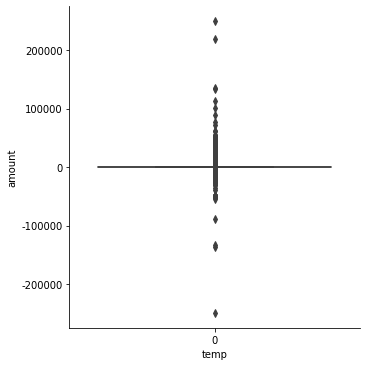

In [ ]:
train['temp'] = 0

#catplot : 하나 이상의 범주형 변수와 수치형 관계를 시각화
# amount 열이 outlier가 있을 수 있다고 생각.
sns.catplot(data=train, x='temp', y='amount', kind='box')



In [ ]:
#데이터의 99퍼센트가 어디에 위치하고 있는지

percentage_99 = np.percentile(train['amount'], 99)
percentage_98 = np.percentile(train['amount'], 98)

print(percentage_99)
print(percentage_98)
#np.percentile ==> 오름차순으로 정렬했을 때 0을 최소값, 100을 최대값으로 해서 백분율로 나타낸 특정 위치

1335.0
800.0


In [ ]:
#대부분의 amount값은 1000을 넘지 않는다. 
#==>1000을 넘는 value들은 outlier로 생각한다.

train = train.loc[(train["amount"] >= -1000) & (train["amount"] <= 1000)]

### **결측치 채워주기**

In [ ]:
train.isnull().sum()

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3301841
days_of_week          0
holyday               0
temp                  0
dtype: int64

In [ ]:
#installments열의 결측치들을 1로 채워주기 <== installments의 null값은 일시불이기 때문에 1로 채워줌
train.loc[train['installments'].isnull(), 'installments'] = 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
train.isnull().sum() #null 값들이 다 사라졌다

store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
temp            0
dtype: int64

In [ ]:
#총액 열 만들기 
#할부(installments)개월수 * 할부단위로 계산한 금액(amount) = total

train['total'] = train['amount'] * train['installments']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train = train.drop(['temp'], axis=1)

In [ ]:
display(train)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0
...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,600.0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,275.0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,350.0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,300.0


## **데이터분석**

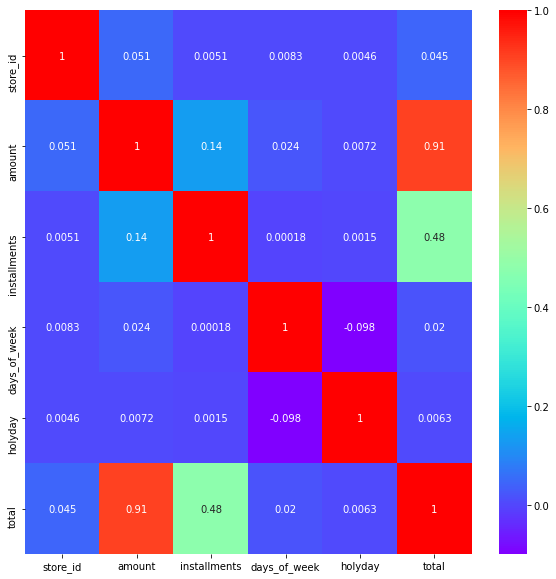

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train[train.columns].corr(), cmap='rainbow', annot=True)

## **1. store_id**

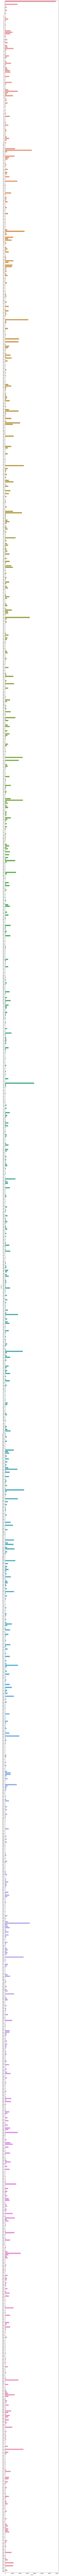

In [ ]:
#subplots()에서는 두 개의 값을 받을 수 있는데 figure, axes 값을 받을 수 있다. 변수명은 상관 없지만 순서는 중요하다
#figure - 전체 subplot(서브 플롯안에 몇 개의 그래프가 있던지 상관 없이 그것들을 담을 하나, 전체 사이즈)
#axes - 전체 중 낱낱개를 말한다(서브플롯 안에 2개(a1, a2)의 그래프가 있다면 a1, a2 를 가리킴)
figure, ax = plt.subplots()
figure.set_size_inches(10,500) #matplotlib로 만든 그림 사이즈 바꾸기

#countplot - 범주형 변수의 빈도수를 시각화하는 함수
sns.countplot(data = train, y ='store_id')

In [ ]:
#위에 시각화한 걸 봤을 때 가게마다 차이가 심하다.

#상위 10개, 하위 10개의 store_id를 확인해본다

count_list = []
for i in range(1799):
  train_temp = train.loc[train['store_id']==i]
  values = {'count' : train_temp.shape[0]}
  count_list.append(values)


count_list = pd.DataFrame.from_dict(count_list) #딕셔너리로 구성된 데이터를 입력받아 dataframe 만드는 함수
count_list = count_list.sort_values(by = 'count', ascending=False)
count_list.index.name = 'store_id' #index에 이름 할당하기

In [ ]:
print(count_list.head(10))
print(count_list.tail(10))

          count
store_id       
0         68715
753       39217
105       35999
1342      33325
428       33281
221       31404
161       26108
1038      25694
323       25219
1366      24940
          count
store_id       
951           0
617           0
1600          0
601           0
255           0
11            0
1681          0
1216          0
506           0
1655          0


In [ ]:
#기간 내에 카드 거래 기록이 하나도 없는 가게의 수 ==> 총 55개
count_list_0 = count_list.loc[count_list['count']==0]
count_list_0.shape

(55, 1)

### **2. 총 매출 기준**

In [ ]:
#매출액 기준 상위 10개의 store 확인

total_list = []
for i in range(1799):
  train_temp = train.loc[train['store_id']==i] #store_id간
  values = {'total' : train_temp['total'].sum()} #total 총 매출 합하기
  total_list.append(values)

total_list = pd.DataFrame.from_dict(total_list)
total_list = total_list.sort_values(by ='total', ascending = False)
total_list.index.name = 'store_id'

print(total_list.head(10))
print(total_list.tail(10))


              total
store_id           
753       9353275.0
1342      7392831.0
0         5318111.0
161       4624716.0
1076      3781650.0
1024      2962918.0
104       2960875.0
1209      2863403.0
597       2787632.0
105       2563178.0
          total
store_id       
601         0.0
1354        0.0
454         0.0
1231        0.0
1530        0.0
1649        0.0
1216        0.0
1582        0.0
1681        0.0
901         0.0


In [ ]:
display(count_list.head(10))
display(total_list.head(10))

#거래액, 거래빈도 둘 다 높은 가게 ==> 0, 753, 105, 1342, 161

,count
store_id,
0,68715
753,39217
105,35999
1342,33325
428,33281
221,31404
161,26108
1038,25694
323,25219


,total
store_id,
753,9353275.0
1342,7392831.0
0,5318111.0
161,4624716.0
1076,3781650.0
1024,2962918.0
104,2960875.0
1209,2863403.0
597,2787632.0


### **날짜, 시간 분리하기**

In [ ]:
def split_date(date):
  return date.split('-')

def split_time(time):
  return time.split(':')

#zip(*train['date']) ==> 왜 저거 *train['date'] 인지?
train['year'], train['month'], train['day'] = zip(*train['date'].apply(lambda x:split_date(x)))
train['hour'], train['minute'], train['second'] = zip(*train['time'].apply(lambda x:split_time(x)))

In [ ]:
train["year"] = train["year"].astype(int)
train["month"] = train["month"].astype(int)
train["day"] = train["day"].astype(int)
train["hour"] = train["hour"].astype(int)
train["minute"] = train["minute"].astype(int)
train["second"] = train["second"].astype(int)

### **- 연, 월, 일 시각화**

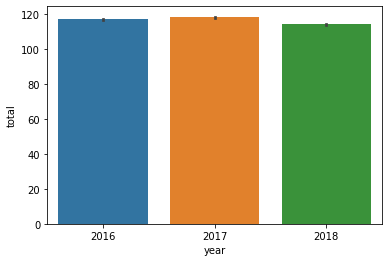

In [ ]:
sns.barplot(data=train, x='year', y='total') #barplot => year 별로 total 평균치를 시각화

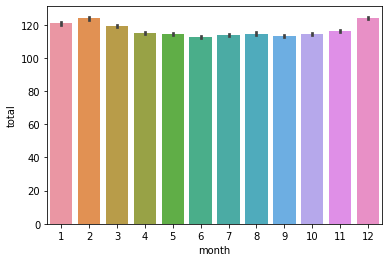

In [ ]:
sns.barplot(data=train, x='month', y ='total')

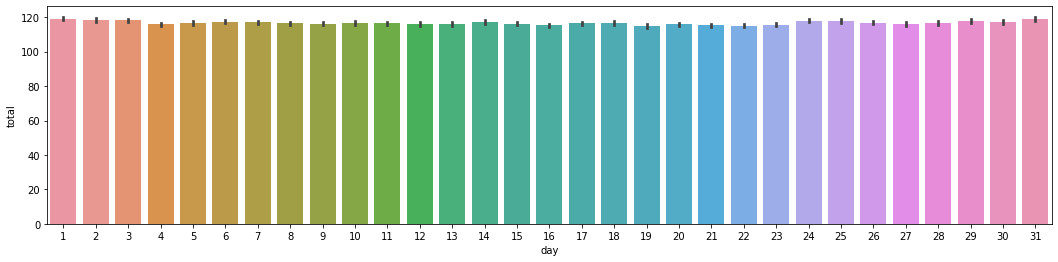

In [ ]:

figure, ax = plt.subplots()
figure.set_size_inches(18,4)
sns.barplot(data=train, x='day', y='total')


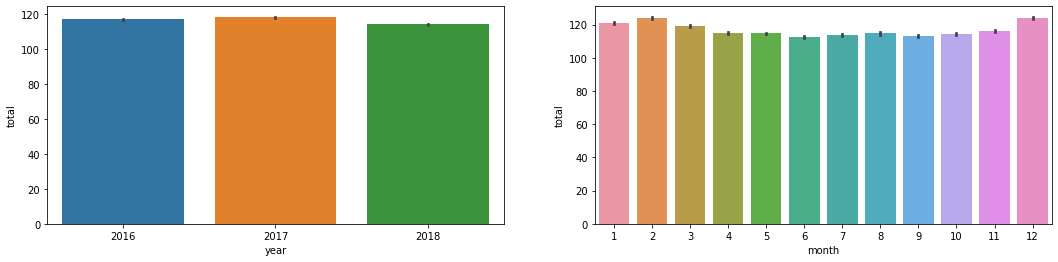

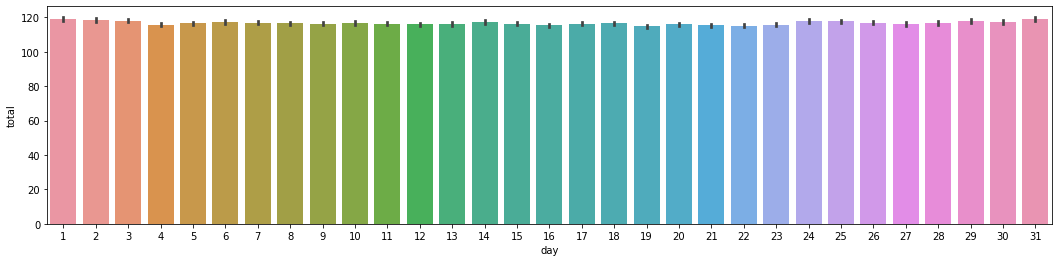

In [ ]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2) #첫째줄에 1행 2열으로 들어가게
#        열1, 열2
figure.set_size_inches(18,4)


sns.barplot(data = train, x='year', y='total', ax=ax1)
sns.barplot(data=train, x="month", y="total", ax=ax2)

figure, ax3 = plt.subplots()
figure.set_size_inches(18,4)
sns.barplot(data = train, x='day', y='total')

### **요일 시각화**

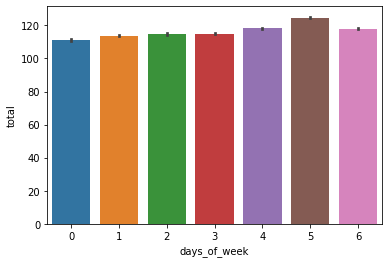

In [ ]:
sns.barplot(data=train, x='days_of_week', y='total')
#월요일(0), 토요일(6) // 토요일이 가장 높음

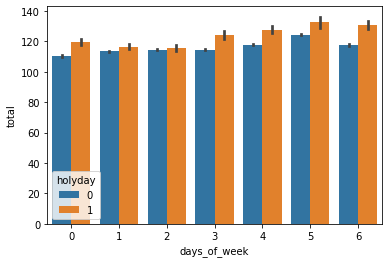

In [ ]:
sns.barplot(data=train, x='days_of_week', y='total', hue = 'holyday') #hue : 카테고리별

#파란색은 공휴일X, 주황색은 공휴일O
#대체적으로 공휴일에 매출이 높다.

### **시간별 시각화**

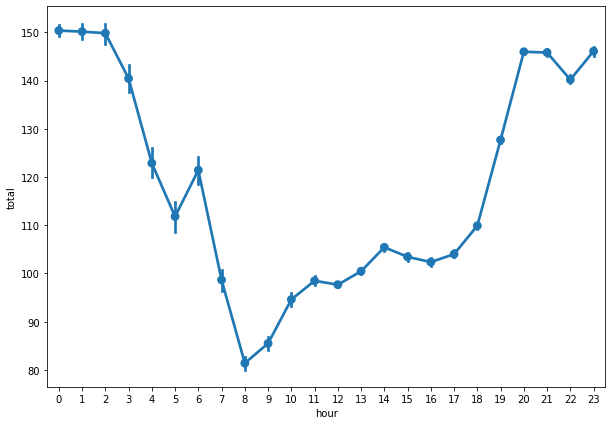

In [ ]:
#시간별 매출 총액 평균
plt.figure(figsize=(10,7))
sns.pointplot(data=train, x='hour', y='total')

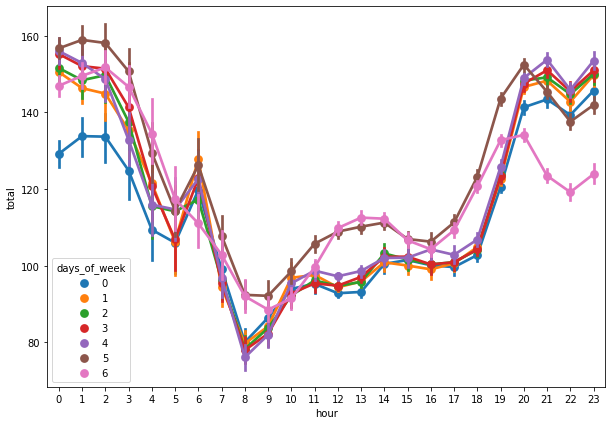

In [ ]:
#요일별 시간별 매출 총액 평균

plt.figure(figsize=(10,7))
sns.pointplot(data = train, x='hour', y='total', hue='days_of_week')

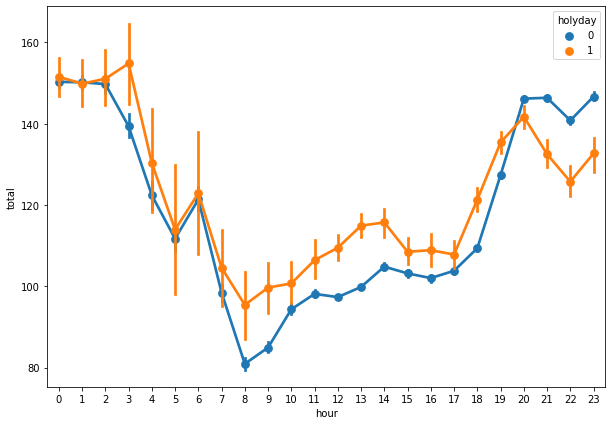

In [ ]:
#공휴일별 시간별 매출 총액 평균

plt.figure(figsize=(10,7))
sns.pointplot(data = train, x='hour', y='total', hue='holyday')

다음날이 공휴일인지 아닌지에 매출 총액의 차이가 난다고 생각.

==> 다음날이 공휴일인지 아닌지 체크

In [ ]:
train['nextday_holiday'] = 0

#금요일과 토요일은 다음날이 주말(공휴일)이기 때문에 1로 채워준다

train.loc[(train['days_of_week']==4) | (train['days_of_week']==5), 'nextday_holiday'] = 1

In [ ]:
#다음날 column을 만들어준다
#nextday_year, nextday_month, nextday_day

train['nextday_year'] = train['year']
train['nextday_month'] = train['month']
train['nextday_day'] = train['day']+1

In [ ]:
#2016년


# 2016년 12월 31일의 다음날은 2017년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_month"] = 1

# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1

# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1

In [ ]:
#2017년

# 2017년 12월 31일의 다음날은 2018년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_month"] = 1
# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [ ]:
#2018년 

# 마지막 날짜가 31일인 달
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311411 entries, 0 to 3362795
Data columns (total 19 columns):
 #   Column           Dtype  
---  ------           -----  
 0   store_id         int64  
 1   date             object 
 2   time             object 
 3   card_id          object 
 4   amount           int64  
 5   installments     float64
 6   days_of_week     int64  
 7   holyday          int64  
 8   total            float64
 9   year             int64  
 10  month            int64  
 11  day              int64  
 12  hour             int64  
 13  minute           int64  
 14  second           int64  
 15  nextday_holiday  int64  
 16  nextday_year     int64  
 17  nextday_month    int64  
 18  nextday_day      int64  
dtypes: float64(2), int64(14), object(3)
memory usage: 665.3+ MB


In [ ]:
#nextday_date를 만들어주기 위해서 int형에서 str형으로 변환
train["nextday_year"] = train["nextday_year"].astype(str)
train["nextday_month"] = train["nextday_month"].astype(str)
train["nextday_day"] = train["nextday_day"].astype(str)

In [ ]:
train['nextday_date'] = train['nextday_year']+ '-'+train['nextday_month'] + '-' + train['nextday_day']

display(train)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,month,day,hour,minute,second,nextday_holiday,nextday_year,nextday_month,nextday_day,nextday_date
0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0,2016,12,14,18,5,31,0,2016,12,15,2016-12-15
1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0,2016,12,14,18,5,54,0,2016,12,15,2016-12-15
2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0,2016,12,19,12,42,31,0,2016,12,20,2016-12-20
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0,2016,12,19,12,48,8,0,2016,12,20,2016-12-20
4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0,2016,12,19,13,31,8,0,2016,12,20,2016-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,600.0,2018,7,19,17,58,31,0,2018,7,20,2018-7-20
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,275.0,2018,7,19,18,54,34,0,2018,7,20,2018-7-20
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,350.0,2018,7,22,14,46,57,0,2018,7,23,2018-7-23
3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,300.0,2018,7,25,18,9,13,0,2018,7,26,2018-7-26


In [ ]:
#holyday가 1인 경우를 빼서, train 데이터 nextday_date값이 holiday_date_list에 속해있으면 1로 채워주기

holiday = train.loc[train['holyday']==1]

print(holiday)

         store_id        date      time  ... nextday_month  nextday_day  nextday_date
772             0  2016-12-25  00:23:22  ...            12           26    2016-12-26
773             0  2016-12-25  00:34:09  ...            12           26    2016-12-26
774             0  2016-12-25  01:11:57  ...            12           26    2016-12-26
775             0  2016-12-25  01:19:19  ...            12           26    2016-12-26
776             0  2016-12-25  01:22:11  ...            12           26    2016-12-26
...           ...         ...       ...  ...           ...          ...           ...
3362646      1799  2017-12-25  14:49:38  ...            12           26    2017-12-26
3362697      1799  2018-02-15  10:10:28  ...             2           16     2018-2-16
3362698      1799  2018-02-15  17:26:19  ...             2           16     2018-2-16
3362740      1799  2018-05-01  18:40:11  ...             5            2      2018-5-2
3362741      1799  2018-05-05  12:35:19  ...          

In [ ]:
holiday_date_list = holiday['date'].tolist()

print(holiday_date_list)

['2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016-12-25', '2016

In [ ]:
#train 데이터의 nextday_date값이 holiday_date_list에 속해있으면
#이전에 만들어 둔 nextday_holiday column에 1을 넣어준다

idx = [idx for idx, value in enumerate(train['nextday_date']) if value in holiday_date_list]
train.loc[idx, 'nextday_holiday'].apply(lambda x:1)

KeyError: ignored

In [ ]:
display(train)

In [ ]:
#nextday_holiday 에 따라 시간별 평균 매출 총액 시각화

plt.figure(figsize=(10,7))
sns.pointplot(data= train, x='hour', y='total', hue = 'nextday_holiday')

nextday_holiday 값을 설정해주고 난 후의 그래프를 보면 
1. 다음날이 휴일인 경우 매출액이 높다.
2. holyday를 기준으로 그래프를 그렸을 때보다 그래프의 편차가 훨씬 작다. 

### **amount 시각화**

In [ ]:
sns.distplot(train['amount'])

#displot함수 ==> 히스토그램 그리기 함수 

In [ ]:
#환불한 건 제외하고

train['amount'] = train.loc[train['amount']>=0]
sns.distplot(train['amount'])

In [ ]:
#좌편향 되어있기 때문에, normalize 과정을 거쳐준다 ==> log transformation 이용 

train['amount'] = np.log(train['amount'])

sns.distplot(train['amount'])

### **total, installments**

total column 값이 0 이상인 경우에 total과 installments의 상관관계